## Topic Modelling using LDA

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [ ]:
for w in ['dogs', 'ran', 'discouraged']:
    print(w, get_lemma(w), get_lemma2(w))

dogs dog dog
ran run ran
discouraged discourage discouraged


In [ ]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
parser.max_length = 200000000

In [ ]:
import random
text_data = []
# with open('/content/drive/MyDrive/Files/EdTech AI/Test Data/questions_text.txt') as text_file, \
#  open('/content/drive/MyDrive/Files/EdTech AI/Test Data/questions_text_tokens.txt', 'w') as token_file:
with open('C:/Users/shiva/Google Drive/Files/EdTech AI/Test Data/questions_text.txt', encoding='utf-8') as text_file, \
 open('C:/Users/shiva/Google Drive/Files/EdTech AI/Test Data/questions_text_tokens.txt', 'w', encoding='utf-8') as token_file:
    for line in text_file:
        tokens = prepare_text_for_lda(line)
        # if random.random() > 0.99:
        token_file.write(', '.join(tokens))
        text_data.append(tokens)
        token_file.write(', ')

In [ ]:
WORKER_COUNT = 16

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

NameError: ignored

In [ ]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

### Try 30 topics

Just added a cell with 30 topics and ran the cell for visualising the model.

In [ ]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.LdaMulticore(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, workers=WORKER_COUNT)
ldamodel.save('model5.gensim')

In [ ]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.055*"\\right" + 0.051*"\\left" + 0.014*"value" + 0.014*"equation"')
(1, '0.020*"increase" + 0.016*"solution" + 0.016*"water" + 0.015*"temperature"')
(2, '0.032*"\\\\times" + 0.011*"force" + 0.010*"velocity" + 0.009*"point"')
(3, '0.026*"following" + 0.014*"reaction" + 0.013*"correct" + 0.011*"\\\\theta"')
(4, '0.070*"\\\\right" + 0.067*"\\\\left" + 0.062*"perm=\\true\\" + 0.062*"src=\\\\"')


In [ ]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(3414, 1), (9419, 1), (46203, 1), (89647, 1)]
[(0, 0.049974974), (1, 0.54973567), (2, 0.29729435), (3, 0.053026065), (4, 0.049968947)]


In [ ]:
ldamodel = gensim.models.LdaMulticore(corpus, num_topics = 3, id2word=dictionary, passes=15, workers=WORKER_COUNT)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.040*"perm=\\true\\" + 0.040*"src=\\\\" + 0.018*"\\\\times" + 0.015*"following"')
(1, '0.052*"\\\\right" + 0.050*"\\\\left" + 0.018*"\\right" + 0.017*"\\left"')
(2, '0.012*"energy" + 0.012*"increase" + 0.011*"point" + 0.009*"temperature"')


In [ ]:
ldamodel = gensim.models.LdaMulticore(corpus, num_topics = 10, id2word=dictionary, passes=15, workers=WORKER_COUNT)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.025*"force" + 0.021*"velocity" + 0.018*"particle" + 0.017*"field"')
(1, '0.033*"charge" + 0.019*"potential" + 0.017*"three" + 0.017*"plate"')
(2, '0.029*"\\\\left" + 0.021*"resistance" + 0.018*"\\theta" + 0.017*"n{h_3"')
(3, '0.091*"\\right" + 0.085*"\\left" + 0.024*"value" + 0.023*"equation"')
(4, '0.031*"solution" + 0.015*"answer" + 0.013*"reduction" + 0.012*"agent"')
(5, '0.011*"cell" + 0.010*"plant" + 0.009*"earth" + 0.009*"chromosome"')
(6, '0.134*"perm=\\true\\" + 0.134*"src=\\\\" + 0.048*"following" + 0.037*"reaction"')
(7, '0.111*"\\\\right" + 0.097*"\\\\left" + 0.026*"\\\\sqrt" + 0.023*"\\\\frac{\\\\pi"')
(8, '0.080*"\\\\times" + 0.033*"energy" + 0.029*"electron" + 0.022*"number"')
(9, '0.025*"temperature" + 0.024*"water" + 0.022*"pressure" + 0.019*"solution"')


In [ ]:
ldamodel = gensim.models.LdaMulticore(corpus, num_topics = 30, id2word=dictionary, passes=15, workers=WORKER_COUNT)
ldamodel.save('model30.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(20, '0.061*"light" + 0.061*"maximum" + 0.054*"explanation" + 0.043*"double"')
(0, '0.099*"potential" + 0.071*"plate" + 0.056*"capacitor" + 0.052*"difference"')
(21, '0.049*"sodium" + 0.046*"chloride" + 0.040*"react" + 0.040*"produce"')
(27, '0.118*"electron" + 0.068*"hydrogen" + 0.049*"state" + 0.043*"energy"')
(15, '0.062*"n{h_3" + 0.059*"c{h_3" + 0.045*"h_2}o" + 0.033*"c{h_2"')
(16, '0.102*"charge" + 0.061*"electric" + 0.049*"positive" + 0.040*"place"')
(7, '0.168*"solution" + 0.063*"false" + 0.031*"form" + 0.027*"aqueous"')
(6, '0.081*"three" + 0.066*"group" + 0.061*"different" + 0.046*"protein"')
(5, '0.105*"force" + 0.065*"surface" + 0.059*"block" + 0.026*"horizontal"')
(4, '0.063*"magnetic" + 0.058*"field" + 0.053*"current" + 0.046*"direction"')
(19, '0.220*"increase" + 0.135*"decrease" + 0.048*"times" + 0.027*"remains"')
(18, '0.182*"following" + 0.140*"correct" + 0.082*"statement" + 0.034*"answer"')
(2, '0.082*"velocity" + 0.059*"speed" + 0.046*"move" + 0.028*"towards"')
(26, 

### pyLDAvis

In [ ]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

NameError: ignored

In [ ]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim

lda30 = gensim.models.ldamodel.LdaModel.load('model30.gensim')
lda_display30 = pyLDAvis.gensim.prepare(lda30, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display30)

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Append topics to question data

I tagged each question with a vector representing how it related to the topics identified by the LDA algorithm in the previous cells, and joined all the tables to get a large table with all the data.

I realised that this was getting too big and removed the question and answer text later, halving the total size.

It's much smaller when compressed of course.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('test_questions_type_and_options.csv')
df.head()

In [ ]:
def find_topic(question):
  tokens = prepare_text_for_lda(question)
  bow = dictionary.doc2bow(tokens)
  return lda30.get_document_topics(bow)

df['Topics_lda30'] = df['QuestionContent'].apply(find_topic)
df.to_csv('test_questions_type_options_and_topics_lda30.csv')

In [ ]:
df.head()

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


QuestionID  ...                                       Topics_lda30
0  ObjectId(546459f1e4b01a0dd10823b7)  ...  [(0, 0.011111365), (1, 0.011111365), (2, 0.011...
1  ObjectId(546459f3e4b01a0dd10823bc)  ...                [(11, 0.50835365), (18, 0.2582787)]
2  ObjectId(54645db9e4b01a0dd1082402)  ...  [(1, 0.8059628), (11, 0.04103771), (18, 0.0790...
3  ObjectId(54645dbae4b01a0dd1082407)  ...  [(1, 0.045025777), (2, 0.2315294), (3, 0.08031...
4  ObjectId(5465ff34e4b084abc3004245)  ...  [(3, 0.17652863), (4, 0.23673292), (12, 0.1678...

[5 rows x 6 columns]

In [ ]:
df2 = pd.read_csv('test_users_questions_attempts_v2.csv')
df2.head()

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TestID                QuestionID                    UserID  TimeTaken  Marks  IsCorrect
0  5b03f58fe4b0e13c51d9a3b6  5b03f586e4b0e13c51d9a38a  5b027c22e4b09e8e4bf1d3b5      49000      1       True
1  5b03f58fe4b0e13c51d9a3b6  5b03f587e4b0e13c51d9a38f  5b027c22e4b09e8e4bf1d3b5      60000      1       True
2  5b03f58fe4b0e13c51d9a3b6  5b03f588e4b0e13c51d9a394  5b027c22e4b09e8e4bf1d3b5      38000      1       True
3  5b03f58fe4b0e13c51d9a3b6  5b03f589e4b0e13c51d9a399  5b027c22e4b09e8e4bf1d3b5      26000      1       True
4  5b03f58fe4b0e13c51d9a3b6  5b03f58ae4b0e13c51d9a39e  5b027c22e4b09e8e4bf1d3b5      30000      1       True

In [ ]:
import re
df['QuestionID'] = df['QuestionID'].apply(lambda x: re.sub(r'ObjectId\((\w+)\)', lambda match: match.group(1), x))
df.head()

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


QuestionID  ...                                       Topics_lda30
0  546459f1e4b01a0dd10823b7  ...  [(0, 0.011111365), (1, 0.011111365), (2, 0.011...
1  546459f3e4b01a0dd10823bc  ...                [(11, 0.50835365), (18, 0.2582787)]
2  54645db9e4b01a0dd1082402  ...  [(1, 0.8059628), (11, 0.04103771), (18, 0.0790...
3  54645dbae4b01a0dd1082407  ...  [(1, 0.045025777), (2, 0.2315294), (3, 0.08031...
4  5465ff34e4b084abc3004245  ...  [(3, 0.17652863), (4, 0.23673292), (12, 0.1678...

[5 rows x 6 columns]

In [ ]:
result = df.join(df2.set_index('QuestionID'), on='QuestionID', how='inner')
result.to_csv('questions_topics_attempts.csv')
result

c:\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Playing with Data

In [ ]:
import pandas as pd
import numpy as np

I just began calling the combined data "result" from the section above and stuck with it.

In [ ]:
result = pd.read_csv('questions_topics_attempts.csv')
result = result.drop(['Unnamed: 0'], axis=1)
result

QuestionID  \
0         26381920700540634025238255154   
1         26381920700540634025238255154   
2         26381920700540634025238255154   
3         26381920700540634025238255154   
4         26381920700540634025238255154   
...                                 ...   
12213467  29776108070192888606339832608   
12213468  29776108088639632680049384229   
12213469  29776108107086376753758935850   
12213470  29776108125533120827468487471   
12213471  29776108143979864901178039092   

                                               Topics_lda30  \
0                           {14: 0.25833312, 23: 0.5083288}   
1                           {14: 0.25833312, 23: 0.5083288}   
2                           {14: 0.25833312, 23: 0.5083288}   
3                           {14: 0.25833312, 23: 0.5083288}   
4                           {14: 0.25833312, 23: 0.5083288}   
...                                                     ...   
12213467  {1: 0.054385968, 4: 0.066581175, 9: 0.09551348...   
12213468  {3: 0.048573624, 4: 0.41016483, 6: 0.07533062,...   
12213469      {0: 0.5308359, 8: 0.16004993, 12: 0.18054008}   
12213470  {0: 0.54210657, 8: 0.23225503, 12: 0.079481, 1...   
12213471  {0: 0.1718113, 10: 0.23697947, 12: 0.12918262,...   

                                 TestID                         UserID  \
0         28638185613192563008768418971  26920092007338642536234536265   
1         28638185613192563008768418971  26605664579824380399980655960   
2         28638185613192563008768418971  27033045774733736796742011980   
3         28638185613192563008768418971  26605666590519484434321782117   
4         28638185613192563008768418971  28195055012468136106497542446   
...                                 ...                            ...   
12213467  29776108162426608974887590712  27051882243169581245953302062   
12213468  29776108162426608974887590712  27051882243169581245953302062   
12213469  29776108162426608974887590712  27051882243169581245953302062   
12213470  29776108162426608974887590712  27051882243169581245953302062   
12213471  29776108162426608974887590712  27051882243169581245953302062   

          TimeTaken  Marks  IsCorrect  TopicID  KMeansCluster  
0              3758      0      False       23              1  
1              1000      1       True       23              1  
2              4000      1       True       23              1  
3              1000      0      False       23              1  
4              1000      0      False       23              1  
...             ...    ...        ...      ...            ...  
12213467      17000      3       True       16              0  
12213468      23000      3       True        4              0  
12213469      21000      3       True        0              0  
12213470      18000      3       True        0              0  
12213471      12000      3       True       10              0  

[12213472 rows x 9 columns]

### Profiling and Segregation

It made sense to profile students roughly by taking all of their parameters into account into 4 groups (or more). The highly complex HDBSCAN* and the relatively simple and naive KMeans clustering algorithms were employed for this task.

HDBSCAN* takes several hours to run if its hyperparameters aren't tuned, but it seems to be tedious to try to bring the cluster count to less than 20000.

KMeans is much simpler, and although it runs blazingly fast, it is not the best clustering algorithm for the job, and has just been used for sheer simplicity and saving time.

To make this work, the hexadecimal IDs were converted to equivalent integer representations, and the clustering algorithms lapped up the data with a smile.

In [ ]:
result['QuestionID'] = result['QuestionID'].apply(int, base=16)
result['TestID'] = result['TestID'].apply(int, base=16)
result['UserID'] = result['UserID'].apply(int, base=16)

In [ ]:
result.dtypes

QuestionID      object
Topics_lda30    object
TestID          object
UserID          object
TimeTaken        int64
Marks            int64
IsCorrect         bool
TopicID          int64
dtype: object

In [ ]:
import hdbscan

In [ ]:
clusterer = hdbscan.HDBSCAN(core_dist_n_jobs=16, min_cluster_size=75,
                            min_samples=150, memory='hdbscan_cache', alpha=1.5,
                            cluster_selection_epsilon=5).fit(result.drop('Topics_lda30', axis=1))

In [ ]:
# dump

import pickle

with open('kmeans_clusterer.pkl', 'wb') as clusterer_pkl:
  pickle.dump(clusterer, clusterer_pkl)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# load (must be done after `import hdbscan`)

import pickle

with open('kmeans_clusterer.pkl', 'rb') as clusterer_pkl:
  clusterer = pickle.load(clusterer_pkl)

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=0).fit(result.drop('Topics_lda30', axis=1))

In [ ]:
clusterer.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
result['KMeansCluster'] = pd.DataFrame(clusterer.labels_)
result

I decided to chop off all outliers (entries with unreasonably large or non-positive `TimeTaken` entries).

In [ ]:
# https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [ ]:
result = result[~is_outlier(result['TimeTaken']) & result['TimeTaken'] > 0]
result

<ipython-input-4-6acadb2241fa>:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


QuestionID  \
10        12402817894761090902873124603245124   
1756      12520937582393415276524494800590601   
1757      12520937582393415276524494800590601   
1759      12520937583681699766659621204628533   
1760      12520937583681699766659621204628533   
...                                       ...   
12211560  13455493168719242093122784214736934   
12211593  13455493176828615415387038894065801   
12211659  13455493179000941825048164484732008   
12211697  13455493179548124125766978072222034   
12211750  13455493181863390268809939758186807   

                                               Topics_lda30  \
10        {0: 0.011111929, 1: 0.011111929, 2: 0.01111192...   
1756      {0: 0.016666815, 1: 0.016666815, 2: 0.01666681...   
1757      {0: 0.016666815, 1: 0.016666815, 2: 0.01666681...   
1759                         {2: 0.25825807, 26: 0.5083818}   
1760                         {2: 0.25825807, 26: 0.5083818}   
...                                                     ...   
12211560  {2: 0.17222361, 5: 0.17184035, 20: 0.3392645, ...   
12211593  {0: 0.033333335, 1: 0.033333335, 2: 0.03333333...   
12211659    {0: 0.16123898, 13: 0.15087242, 27: 0.55931604}   
12211697                                    {11: 0.9033306}   
12211750                   {17: 0.15642023, 27: 0.77177864}   

                                       TestID  \
10        13106880912757822921688870876711281   
1756      12520937606868931210364728824521062   
1757      12520937606868931210364728824521062   
1759      12520937606868931210364728824521062   
1760      12520937606868931210364728824521062   
...                                       ...   
12211560  13455493183151674325016229350242391   
12211593  13455493183151674325016229350242391   
12211659  13455493183151674325016229350242391   
12211697  13455493183151674325016229350242391   
12211750  13455493183151674325016229350242391   

                                       UserID  TimeTaken  Marks  IsCorrect  \
10        12516784850738258753866677062165093       5305      0      False   
1756      12664584494124139410065514717336694       4869      0       True   
1757      12664584494124139410065514717336694         41      0       True   
1759      12664584494124139410065514717336694      13961      0       True   
1760      12664584494124139410065514717336694       2569      0       True   
...                                       ...        ...    ...        ...   
12211560  13133103033916141719867744075210856      17499      4       True   
12211593  13133103033916141719867744075210856      16145      4       True   
12211659  13133103033916141719867744075210856       4723     -1      False   
12211697  13133103033916141719867744075210856      15573      4       True   
12211750  13133103033916141719867744075210856      12969      4       True   

          TopicID  KMeansCluster  
10             16              1  
1756           16              1  
1757           16              1  
1759           26              1  
1760           26              1  
...           ...            ...  
12211560       20              0  
12211593        0              0  
12211659       27              0  
12211697       11              0  
12211750       27              0  

[234896 rows x 9 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='UserID', ylabel='TimeTaken'>

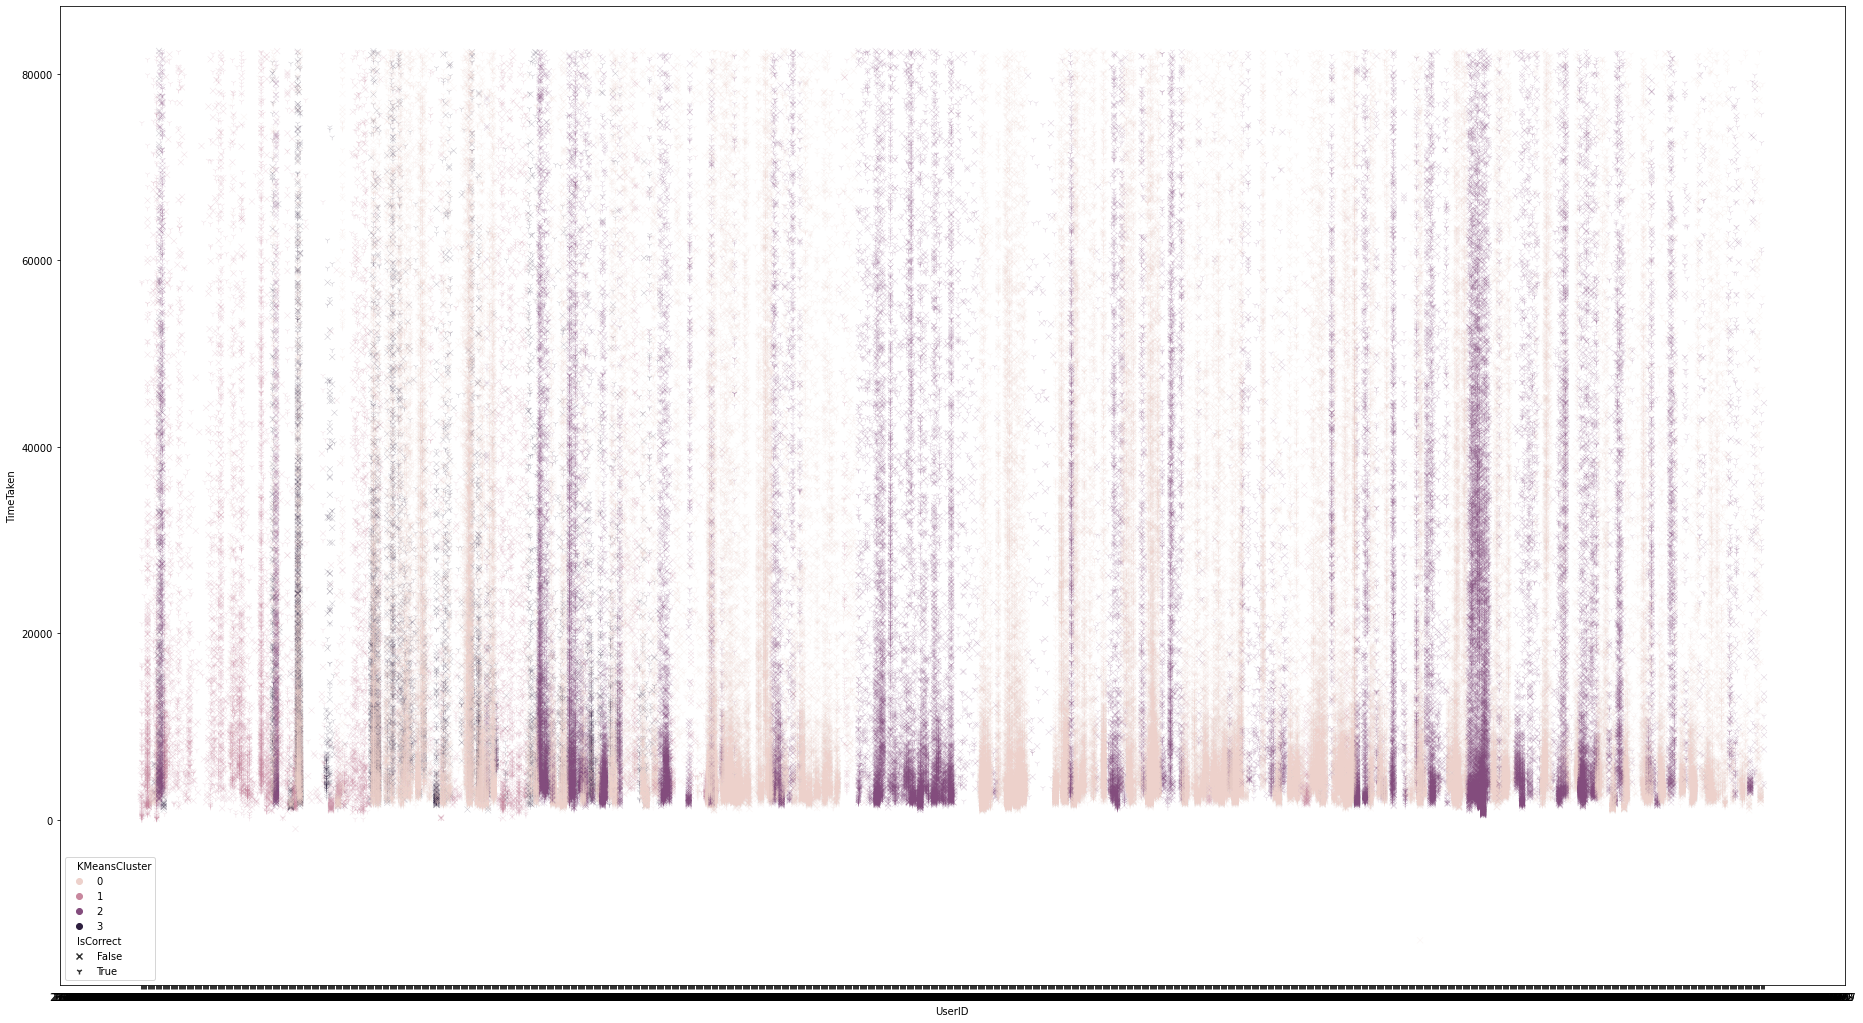

In [ ]:
plt.figure(figsize=(32,18))
# f, ax = plt.subplots(figsize=(32, 18))
# ax.set_yscale('function', functions=(np.log, np.exp))

sns.scatterplot(data=result, hue='KMeansCluster', y='TimeTaken',
                style='IsCorrect', x='UserID', alpha=0.25,
                markers={True: '1', False: 'x'})

<Figure size 2304x1296 with 0 Axes>

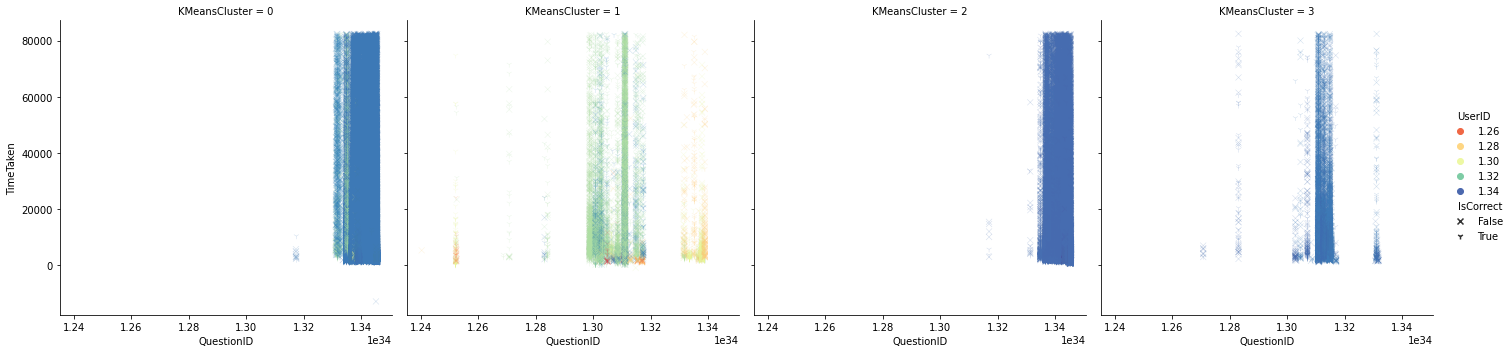

In [ ]:
# With QuestionID on x

plt.figure(figsize=(32, 18))
sns.relplot(data=result, y='TimeTaken', x='QuestionID',
            hue='UserID',  col='KMeansCluster', style='IsCorrect', 
            markers={True: '1', False: 'x'}, 
            palette=sns.color_palette("Spectral", as_cmap=True), 
            alpha=0.25)

From the hue of the points, it will be obvious who solved more questions.

<Figure size 2304x1296 with 0 Axes>

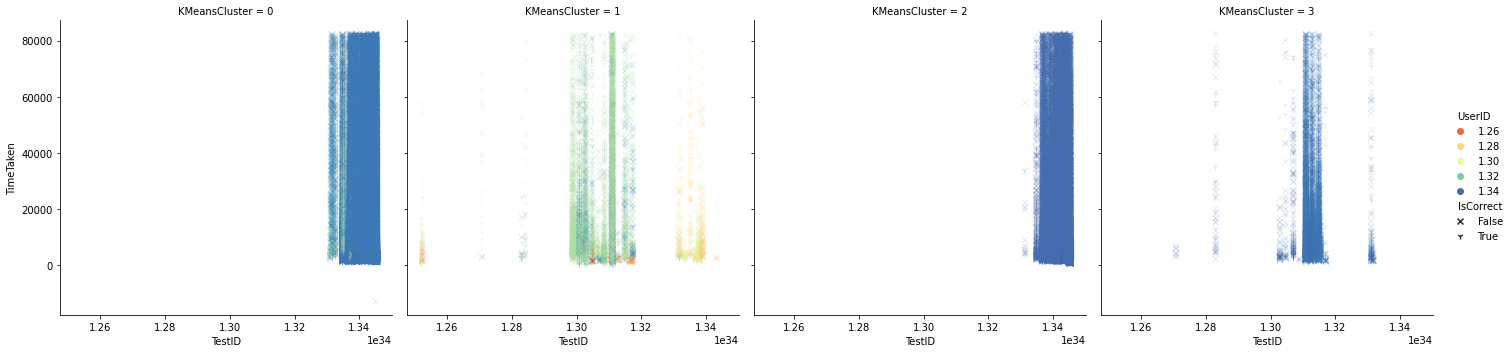

In [ ]:
# With TestID on x

plt.figure(figsize=(32, 18))
sns.relplot(data=result, y='TimeTaken', x='TestID',
            hue='UserID',  col='KMeansCluster', style='IsCorrect', 
            markers={True: '1', False: 'x'}, 
            palette=sns.color_palette("Spectral", as_cmap=True), 
            alpha=0.25)

The graphs look identical to a fault.

<Figure size 2304x1296 with 0 Axes>

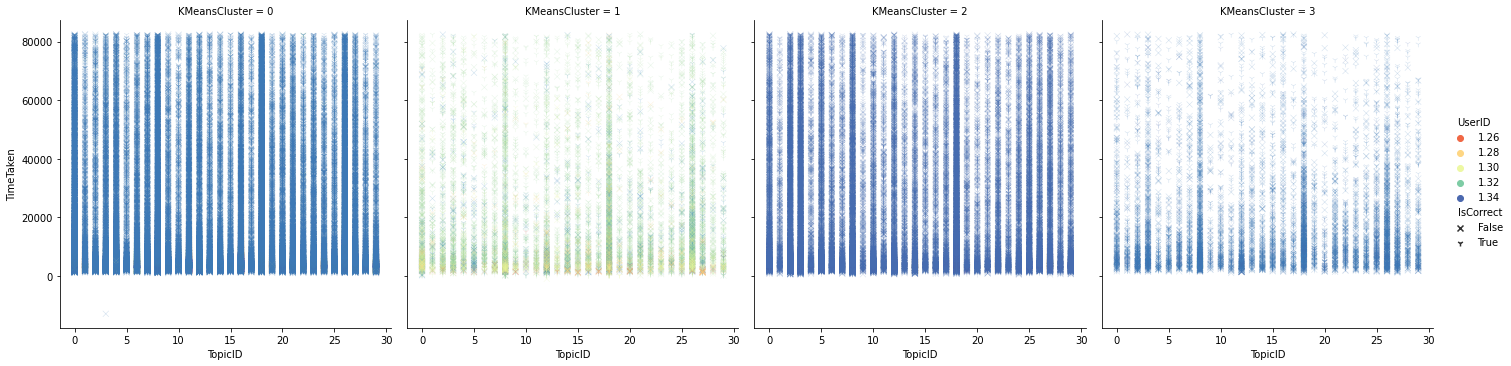

In [ ]:
# With TopicID on x

plt.figure(figsize=(32, 18))
sns.relplot(data=result, y='TimeTaken', x='TopicID',
            hue='UserID',  col='KMeansCluster', style='IsCorrect', 
            markers={True: '1', False: 'x'}, 
            palette=sns.color_palette("Spectral", as_cmap=True), 
            alpha=0.25)

How many entries fall into each cluster? How many among them are correct or wrong?

In [ ]:
result.drop(columns=['QuestionID', 'Topics_lda30',
                     'TestID', 'UserID',
                     'TimeTaken', 'Marks',
                     'IsCorrect', 'TopicID']).value_counts()

KMeansCluster
0                149583
2                 63139
1                 11387
3                 10787
dtype: int64

In [ ]:
result.drop(columns=['QuestionID', 'Topics_lda30',
                     'TestID', 'UserID',
                     'TimeTaken', 'Marks',
                     'TopicID']).value_counts()

IsCorrect  KMeansCluster
True       0                94839
False      0                54744
True       2                38076
False      2                25063
True       1                 7438
           3                 7005
False      1                 3949
           3                 3782
dtype: int64

In [ ]:
result.nunique()

QuestionID       58908
Topics_lda30     48862
TestID            3991
UserID            1417
TimeTaken        37492
Marks                9
IsCorrect            2
TopicID             30
KMeansCluster        4
dtype: int64

We'd also like to know how many students go in each cluster.

In [ ]:
result.groupby(['KMeansCluster'], as_index=False).agg({'UserID' : 'count'})

KMeansCluster  UserID
0              0  149583
1              1   11387
2              2   63139
3              3   10787

### The Good, The Bad, and The Backbenchers

The following code helped me evaluate students based on how many questions they got right and wrong, at a glance.

Clearly, there are certain students who just solved more questions than others.

The diagrams were generated before I turned the hexadecimal IDs into integers.

In [ ]:
from ast import literal_eval

result["Topics_lda30"] = result["Topics_lda30"].apply(lambda topics: literal_eval(topics))
result

QuestionID  \
0         553e9d02e4b0cdf60540d632   
1         553e9d02e4b0cdf60540d632   
2         553e9d02e4b0cdf60540d632   
3         553e9d02e4b0cdf60540d632   
4         553e9d02e4b0cdf60540d632   
...                            ...   
12213467  60363824e4b042fa5ef31b20   
12213468  60363825e4b042fa5ef31b25   
12213469  60363826e4b042fa5ef31b2a   
12213470  60363827e4b042fa5ef31b2f   
12213471  60363828e4b042fa5ef31b34   

                                               Topics_lda30  \
0                           {14: 0.25833312, 23: 0.5083288}   
1                           {14: 0.25833312, 23: 0.5083288}   
2                           {14: 0.25833312, 23: 0.5083288}   
3                           {14: 0.25833312, 23: 0.5083288}   
4                           {14: 0.25833312, 23: 0.5083288}   
...                                                     ...   
12213467  {1: 0.054385968, 4: 0.066581175, 9: 0.09551348...   
12213468  {3: 0.048573624, 4: 0.41016483, 6: 0.07533062,...   
12213469      {0: 0.5308359, 8: 0.16004993, 12: 0.18054008}   
12213470  {0: 0.54210657, 8: 0.23225503, 12: 0.079481, 1...   
12213471  {0: 0.1718113, 10: 0.23697947, 12: 0.12918262,...   

                            TestID                    UserID  TimeTaken  \
0         5c88f3b0e4b0ee179899a49b  56fbc737e4b007c76b54cd49       3758   
1         5c88f3b0e4b0ee179899a49b  55f7b09ee4b00eed37d03558       1000   
2         5c88f3b0e4b0ee179899a49b  5759361be4b0a1bd1be8cc4c       4000   
3         5c88f3b0e4b0ee179899a49b  55f7b10be4b00eed37d03565       1000   
4         5c88f3b0e4b0ee179899a49b  5b1a6722e4b02ce8ae62092e       1000   
...                            ...                       ...        ...   
12213467  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      17000   
12213468  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      23000   
12213469  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      21000   
12213470  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      18000   
12213471  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      12000   

          Marks  IsCorrect  
0             0      False  
1             1       True  
2             1       True  
3             0      False  
4             0      False  
...         ...        ...  
12213467      3       True  
12213468      3       True  
12213469      3       True  
12213470      3       True  
12213471      3       True  

[12213472 rows x 7 columns]

In [ ]:
from ast import literal_eval

result["TopicID"] = result["Topics_lda30"].apply(lambda topics: list(topics.keys())[list(topics.values()).index(max(topics.values()))])
result

QuestionID  \
0         553e9d02e4b0cdf60540d632   
1         553e9d02e4b0cdf60540d632   
2         553e9d02e4b0cdf60540d632   
3         553e9d02e4b0cdf60540d632   
4         553e9d02e4b0cdf60540d632   
...                            ...   
12213467  60363824e4b042fa5ef31b20   
12213468  60363825e4b042fa5ef31b25   
12213469  60363826e4b042fa5ef31b2a   
12213470  60363827e4b042fa5ef31b2f   
12213471  60363828e4b042fa5ef31b34   

                                               Topics_lda30  \
0                           {14: 0.25833312, 23: 0.5083288}   
1                           {14: 0.25833312, 23: 0.5083288}   
2                           {14: 0.25833312, 23: 0.5083288}   
3                           {14: 0.25833312, 23: 0.5083288}   
4                           {14: 0.25833312, 23: 0.5083288}   
...                                                     ...   
12213467  {1: 0.054385968, 4: 0.066581175, 9: 0.09551348...   
12213468  {3: 0.048573624, 4: 0.41016483, 6: 0.07533062,...   
12213469      {0: 0.5308359, 8: 0.16004993, 12: 0.18054008}   
12213470  {0: 0.54210657, 8: 0.23225503, 12: 0.079481, 1...   
12213471  {0: 0.1718113, 10: 0.23697947, 12: 0.12918262,...   

                            TestID                    UserID  TimeTaken  \
0         5c88f3b0e4b0ee179899a49b  56fbc737e4b007c76b54cd49       3758   
1         5c88f3b0e4b0ee179899a49b  55f7b09ee4b00eed37d03558       1000   
2         5c88f3b0e4b0ee179899a49b  5759361be4b0a1bd1be8cc4c       4000   
3         5c88f3b0e4b0ee179899a49b  55f7b10be4b00eed37d03565       1000   
4         5c88f3b0e4b0ee179899a49b  5b1a6722e4b02ce8ae62092e       1000   
...                            ...                       ...        ...   
12213467  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      17000   
12213468  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      23000   
12213469  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      21000   
12213470  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      18000   
12213471  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      12000   

          Marks  IsCorrect  TopicID  
0             0      False       23  
1             1       True       23  
2             1       True       23  
3             0      False       23  
4             0      False       23  
...         ...        ...      ...  
12213467      3       True       16  
12213468      3       True        4  
12213469      3       True        0  
12213470      3       True        0  
12213471      3       True       10  

[12213472 rows x 8 columns]

In [ ]:
print("True")
print("====")
trues = pd.DataFrame(result[result["IsCorrect"] == True])
trues

True
====


QuestionID  \
1         553e9d02e4b0cdf60540d632   
2         553e9d02e4b0cdf60540d632   
5         553e9d06e4b0cdf60540d637   
13        553e9d07e4b0cdf60540d63c   
16        553e9d08e4b0cdf60540d641   
...                            ...   
12213467  60363824e4b042fa5ef31b20   
12213468  60363825e4b042fa5ef31b25   
12213469  60363826e4b042fa5ef31b2a   
12213470  60363827e4b042fa5ef31b2f   
12213471  60363828e4b042fa5ef31b34   

                                               Topics_lda30  \
1                           {14: 0.25833312, 23: 0.5083288}   
2                           {14: 0.25833312, 23: 0.5083288}   
5         {0: 0.01666668, 1: 0.01666668, 2: 0.01666668, ...   
13        {0: 0.011111929, 1: 0.011111929, 2: 0.01111192...   
16        {0: 0.11484248, 6: 0.13403085, 7: 0.11481406, ...   
...                                                     ...   
12213467  {1: 0.054385968, 4: 0.066581175, 9: 0.09551348...   
12213468  {3: 0.048573624, 4: 0.41016483, 6: 0.07533062,...   
12213469      {0: 0.5308359, 8: 0.16004993, 12: 0.18054008}   
12213470  {0: 0.54210657, 8: 0.23225503, 12: 0.079481, 1...   
12213471  {0: 0.1718113, 10: 0.23697947, 12: 0.12918262,...   

                            TestID                    UserID  TimeTaken  \
1         5c88f3b0e4b0ee179899a49b  55f7b09ee4b00eed37d03558       1000   
2         5c88f3b0e4b0ee179899a49b  5759361be4b0a1bd1be8cc4c       4000   
5         5c88f3b0e4b0ee179899a49b  56fbc737e4b007c76b54cd49       3114   
13        5c88f3b0e4b0ee179899a49b  55f7b10be4b00eed37d03565       1000   
16        5c52dbace4b02c9b9a977f74  5ba49fe4e4b0797604a8f1f2       1000   
...                            ...                       ...        ...   
12213467  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      17000   
12213468  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      23000   
12213469  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      21000   
12213470  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      18000   
12213471  60363829e4b042fa5ef31b38  5768cae2e4b0f34317c95e2e      12000   

          Marks  IsCorrect  TopicID  
1             1       True       23  
2             1       True       23  
5             1       True       18  
13            1       True       16  
16            1       True       25  
...         ...        ...      ...  
12213467      3       True       16  
12213468      3       True        4  
12213469      3       True        0  
12213470      3       True        0  
12213471      3       True       10  

[7214352 rows x 8 columns]

In [ ]:
trues_by_topic = trues.groupby(['UserID', 'TopicID'], as_index=False).agg({'IsCorrect' : 'count'})
trues_by_topic = trues_by_topic.pivot(index='UserID', columns='TopicID').fillna(0)
trues_by_topic

IsCorrect                                          \
TopicID                         0    1    2    3    4    5    6    7    8    
UserID                                                                       
54c49abae4b00ad4176994cc       0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  2.0   
54e3370ae4b08087c78c179d       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
552e58cae4b06a6e62306637       0.0  0.0  0.0  0.0  0.0  2.0  0.0  3.0  0.0   
552e58cae4b06a6e6230663b       0.0  0.0  0.0  0.0  0.0  1.0  0.0  4.0  2.0   
552e58cbe4b06a6e62306667       0.0  0.0  0.0  0.0  1.0  2.0  0.0  5.0  1.0   
...                            ...  ...  ...  ...  ...  ...  ...  ...  ...   
6033a18de4b02384ef21809a       2.0  2.0  0.0  5.0  0.0  0.0  0.0  3.0  3.0   
6033c25ae4b02384ef219184       8.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0   
6033c319e4b02384ef219217      10.0  0.0  0.0  3.0  1.0  0.0  0.0  3.0  0.0   
6033c446e4b02384ef2192db       9.0  0.0  0.0  3.0  0.0  0.0  0.0  3.0  1.0   
6036301ce4b02384ef221c0b       1.0  0.0  0.0  0.0  0.0  0.0  3.0  1.0  0.0   

                               ...                                          \
TopicID                    9   ...   20   21   22   23   24   25   26   27   
UserID                         ...                                           
54c49abae4b00ad4176994cc  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
54e3370ae4b08087c78c179d  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
552e58cae4b06a6e62306637  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
552e58cae4b06a6e6230663b  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
552e58cbe4b06a6e62306667  0.0  ...  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6033a18de4b02384ef21809a  1.0  ...  1.0  5.0  1.0  0.0  2.0  3.0  9.0  1.0   
6033c25ae4b02384ef219184  0.0  ...  0.0  1.0  0.0  1.0  2.0  0.0  6.0  1.0   
6033c319e4b02384ef219217  0.0  ...  0.0  4.0  0.0  1.0  1.0  0.0  6.0  1.0   
6033c446e4b02384ef2192db  0.0  ...  0.0  3.0  0.0  0.0  2.0  0.0  7.0  1.0   
6036301ce4b02384ef221c0b  1.0  ...  1.0  0.0  2.0  2.0  0.0  1.0  0.0  1.0   

                                    
TopicID                    28   29  
UserID                              
54c49abae4b00ad4176994cc  0.0  0.0  
54e3370ae4b08087c78c179d  0.0  1.0  
552e58cae4b06a6e62306637  0.0  0.0  
552e58cae4b06a6e6230663b  1.0  1.0  
552e58cbe4b06a6e62306667  0.0  2.0  
...                       ...  ...  
6033a18de4b02384ef21809a  1.0  0.0  
6033c25ae4b02384ef219184  1.0  0.0  
6033c319e4b02384ef219217  1.0  1.0  
6033c446e4b02384ef2192db  1.0  0.0  
6036301ce4b02384ef221c0b  1.0  1.0  

[19468 rows x 30 columns]

In [ ]:
print("False")
print("=====")
falses = pd.DataFrame(result[result["IsCorrect"] == False])
falses

False
=====


QuestionID  \
0         553e9d02e4b0cdf60540d632   
3         553e9d02e4b0cdf60540d632   
4         553e9d02e4b0cdf60540d632   
6         553e9d06e4b0cdf60540d637   
7         553e9d06e4b0cdf60540d637   
...                            ...   
12211778  602fca3ee4b042fa5ef2b408   
12211780  602fca3ee4b042fa5ef2b408   
12211782  602fca3ee4b042fa5ef2b408   
12211783  602fca3ee4b042fa5ef2b408   
12211791  602fca3fe4b042fa5ef2b40d   

                                               Topics_lda30  \
0                           {14: 0.25833312, 23: 0.5083288}   
3                           {14: 0.25833312, 23: 0.5083288}   
4                           {14: 0.25833312, 23: 0.5083288}   
6         {0: 0.01666668, 1: 0.01666668, 2: 0.01666668, ...   
7         {0: 0.01666668, 1: 0.01666668, 2: 0.01666668, ...   
...                                                     ...   
12211778  {0: 0.08915397, 3: 0.2180042, 20: 0.24153179, ...   
12211780  {0: 0.08915397, 3: 0.2180042, 20: 0.24153179, ...   
12211782  {0: 0.08915397, 3: 0.2180042, 20: 0.24153179, ...   
12211783  {0: 0.08915397, 3: 0.2180042, 20: 0.24153179, ...   
12211791                    {24: 0.5083158, 26: 0.25833488}   

                            TestID                    UserID  TimeTaken  \
0         5c88f3b0e4b0ee179899a49b  56fbc737e4b007c76b54cd49       3758   
3         5c88f3b0e4b0ee179899a49b  55f7b10be4b00eed37d03565       1000   
4         5c88f3b0e4b0ee179899a49b  5b1a6722e4b02ce8ae62092e       1000   
6         5c88f3b0e4b0ee179899a49b  55f7b09ee4b00eed37d03558       2000   
7         5c88f3b0e4b0ee179899a49b  5759361be4b0a1bd1be8cc4c       2000   
...                            ...                       ...        ...   
12211778  602fca40e4b042fa5ef2b411  5d00d481e4b0f0f1f4a0ea20      58000   
12211780  602fca40e4b042fa5ef2b411  5d257773e4b0f3545a17e1fe      49000   
12211782  602fca40e4b042fa5ef2b411  5d257773e4b0f3545a17e1fa       2000   
12211783  602fca40e4b042fa5ef2b411  5d2573d0e4b0f3545a17df24       2000   
12211791  602fca40e4b042fa5ef2b411  5d00d481e4b0f0f1f4a0ea20      10000   

          Marks  IsCorrect  TopicID  
0             0      False       23  
3             0      False       23  
4             0      False       23  
6             0      False       18  
7             0      False       18  
...         ...        ...      ...  
12211778     -1      False       20  
12211780     -1      False       20  
12211782     -1      False       20  
12211783     -1      False       20  
12211791     -1      False       24  

[4999120 rows x 8 columns]

In [ ]:
falses_by_topic = falses.groupby(['UserID', 'TopicID'], as_index=False).agg({'IsCorrect' : 'count'})
falses_by_topic = falses_by_topic.pivot(index='UserID', columns='TopicID').fillna(0)
falses_by_topic

IsCorrect                                           \
TopicID                         0    1    2    3    4    5    6    7     8    
UserID                                                                        
54c49abae4b00ad4176994cc       0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   3.0   
54e3370ae4b08087c78c179d       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
552e58cae4b06a6e62306637       0.0  0.0  0.0  0.0  0.0  1.0  0.0  7.0   0.0   
552e58cae4b06a6e6230663b       0.0  0.0  0.0  0.0  1.0  2.0  0.0  6.0   1.0   
552e58cbe4b06a6e62306667       0.0  0.0  0.0  0.0  1.0  1.0  0.0  6.0  14.0   
...                            ...  ...  ...  ...  ...  ...  ...  ...   ...   
6033a18de4b02384ef21809a       0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   0.0   
6033c25ae4b02384ef219184       2.0  0.0  0.0  2.0  1.0  0.0  0.0  3.0   1.0   
6033c319e4b02384ef219217       0.0  0.0  1.0  0.0  0.0  0.0  0.0  3.0   1.0   
6033c446e4b02384ef2192db       1.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0   0.0   
6036301ce4b02384ef221c0b       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   

                               ...                                           \
TopicID                    9   ...    20   21   22   23   24   25   26   27   
UserID                         ...                                            
54c49abae4b00ad4176994cc  0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
54e3370ae4b08087c78c179d  0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
552e58cae4b06a6e62306637  0.0  ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
552e58cae4b06a6e6230663b  0.0  ...   0.0  1.0  0.0  2.0  1.0  1.0  0.0  0.0   
552e58cbe4b06a6e62306667  1.0  ...  10.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
...                       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
6033a18de4b02384ef21809a  0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0   
6033c25ae4b02384ef219184  0.0  ...   1.0  2.0  0.0  0.0  0.0  0.0  1.0  0.0   
6033c319e4b02384ef219217  0.0  ...   1.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0   
6033c446e4b02384ef2192db  0.0  ...   1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0   
6036301ce4b02384ef221c0b  0.0  ...   0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   

                                    
TopicID                    28   29  
UserID                              
54c49abae4b00ad4176994cc  0.0  0.0  
54e3370ae4b08087c78c179d  0.0  1.0  
552e58cae4b06a6e62306637  0.0  0.0  
552e58cae4b06a6e6230663b  2.0  0.0  
552e58cbe4b06a6e62306667  6.0  0.0  
...                       ...  ...  
6033a18de4b02384ef21809a  0.0  0.0  
6033c25ae4b02384ef219184  0.0  1.0  
6033c319e4b02384ef219217  0.0  0.0  
6033c446e4b02384ef2192db  0.0  1.0  
6036301ce4b02384ef221c0b  0.0  0.0  

[19894 rows x 30 columns]

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='UserID'>

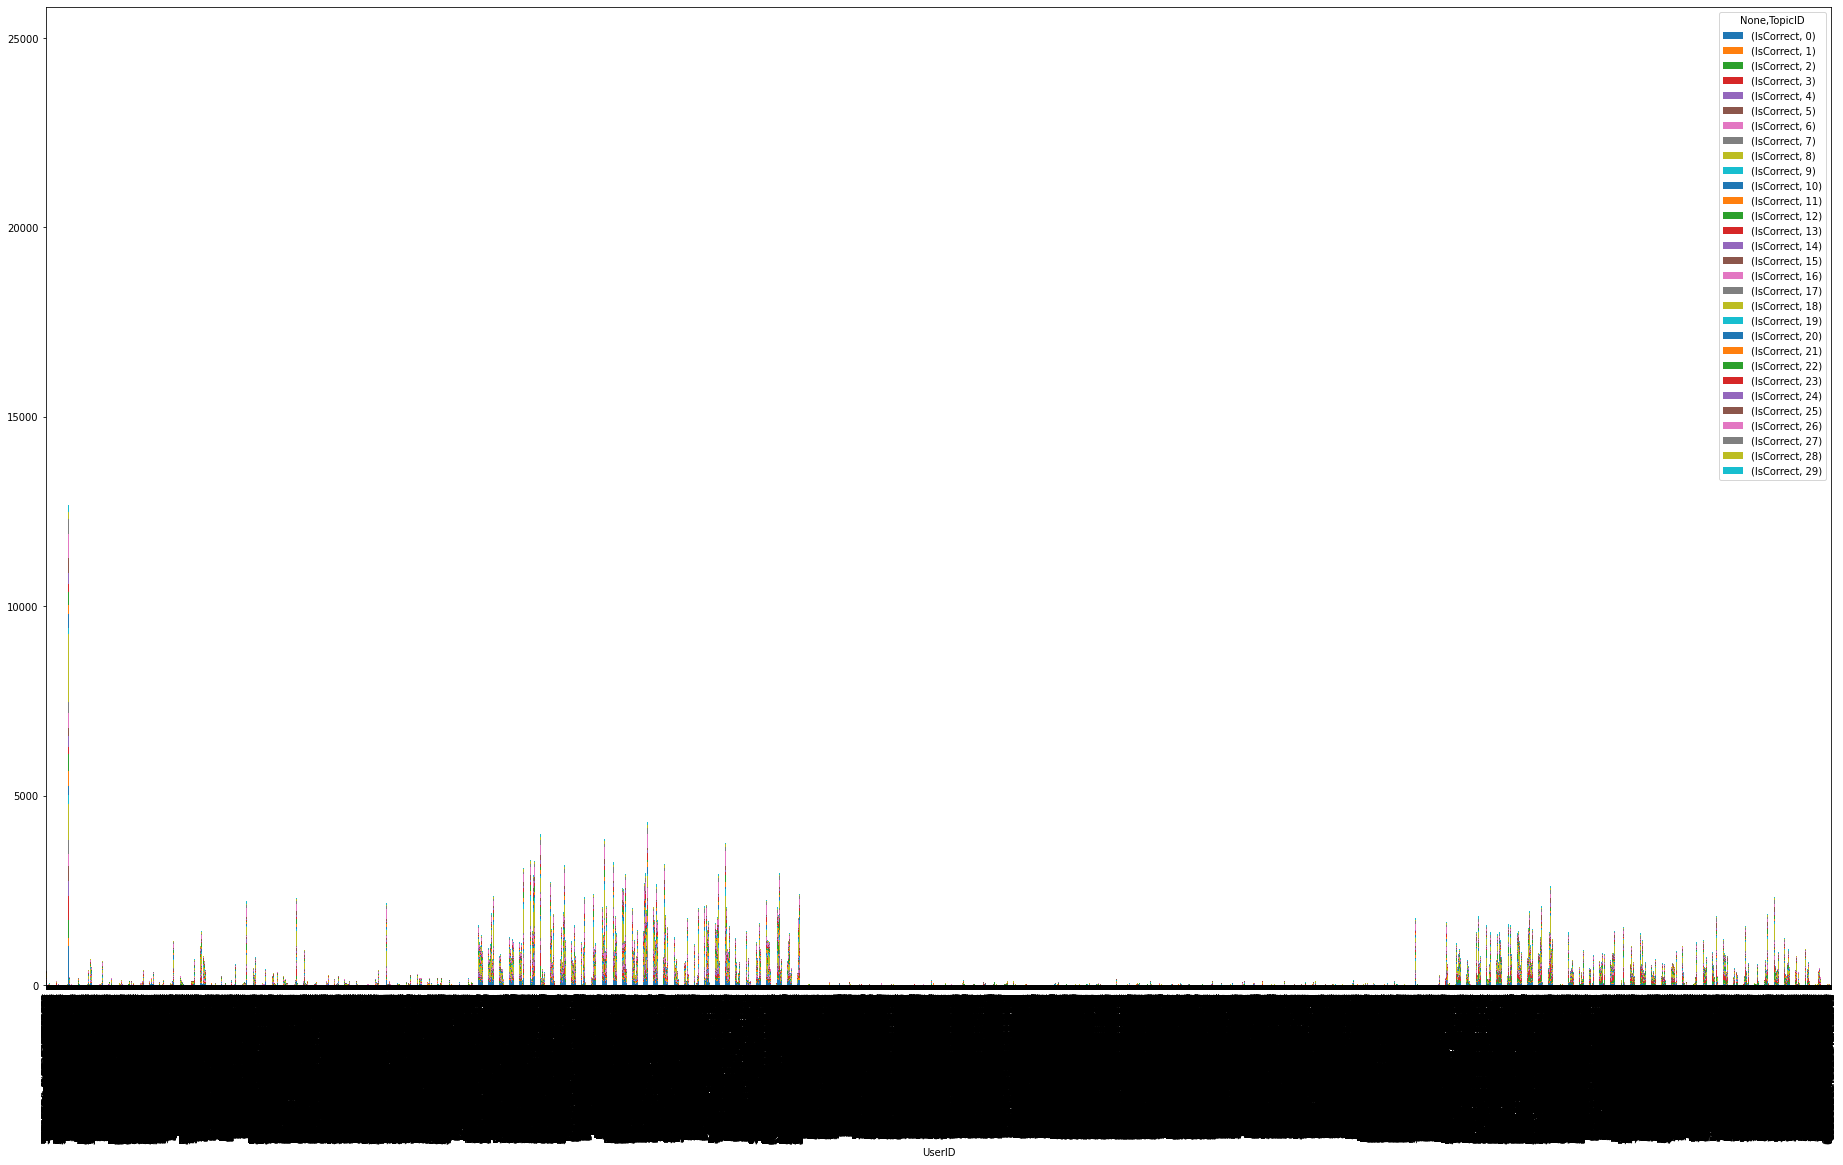

In [ ]:
# sns.scatterplot(data=trues_by_topic, y='IsCorrect', x='UserID', hue='TopicID')
trues_by_topic.plot(kind='bar', stacked=True, figsize=(32,18))

In [ ]:
trues_by_topic.describe()

IsCorrect                                                         \
TopicID            0             1             2            3             4    
count    19468.000000  19468.000000  19468.000000  19468.00000  19468.000000   
mean        23.230378      5.790374     15.678498     18.34513      9.977502   
std         45.409251     11.986807     32.407868     35.42293     23.173772   
min          0.000000      0.000000      0.000000      0.00000      0.000000   
25%          0.000000      0.000000      0.000000      0.00000      0.000000   
50%          3.000000      1.000000      2.000000      2.00000      1.000000   
75%         26.000000      6.000000     16.000000     21.00000      8.000000   
max       1862.000000    385.000000   1160.000000   1031.00000    660.000000   

                                                                               \
TopicID            5             6             7             8             9    
count    19468.000000  19468.000000  19468.000000  19468.000000  19468.000000   
mean         9.264999     10.646394     10.147319     31.983511      6.248048   
std         18.663532     22.201959     21.448748     66.704779     12.976373   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          1.000000      2.000000      1.000000      2.000000      1.000000   
75%          9.000000     11.000000     10.000000     30.000000      5.000000   
max        618.000000    656.000000    657.000000   1702.000000    356.000000   

         ...                                                          \
TopicID  ...            20            21            22            23   
count    ...  19468.000000  19468.000000  19468.000000  19468.000000   
mean     ...      8.653637      8.398089      9.814670      8.752003   
std      ...     19.380488     18.410220     23.313797     18.964760   
min      ...      0.000000      0.000000      0.000000      0.000000   
25%      ...      0.000000      0.000000      0.000000      0.000000   
50%      ...      1.000000      1.000000      1.000000      1.000000   
75%      ...      8.000000      8.000000      8.000000      8.000000   
max      ...    749.000000    604.000000    703.000000    591.000000   

                                                                               \
TopicID            24            25            26            27            28   
count    19468.000000  19468.000000  19468.000000  19468.000000  19468.000000   
mean         7.822016     11.430039     22.006883     12.072992      6.161085   
std         14.672501     22.145305     48.487400     22.957461     11.905539   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          1.000000      2.000000      2.000000      1.000000      1.000000   
75%         10.000000     13.000000     20.000000     16.000000      7.000000   
max        468.000000    762.000000   1565.000000    857.000000    334.000000   

                       
TopicID            29  
count    19468.000000  
mean         7.926752  
std         14.366608  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%         10.000000  
max        510.000000  

[8 rows x 30 columns]

<AxesSubplot:xlabel='UserID'>

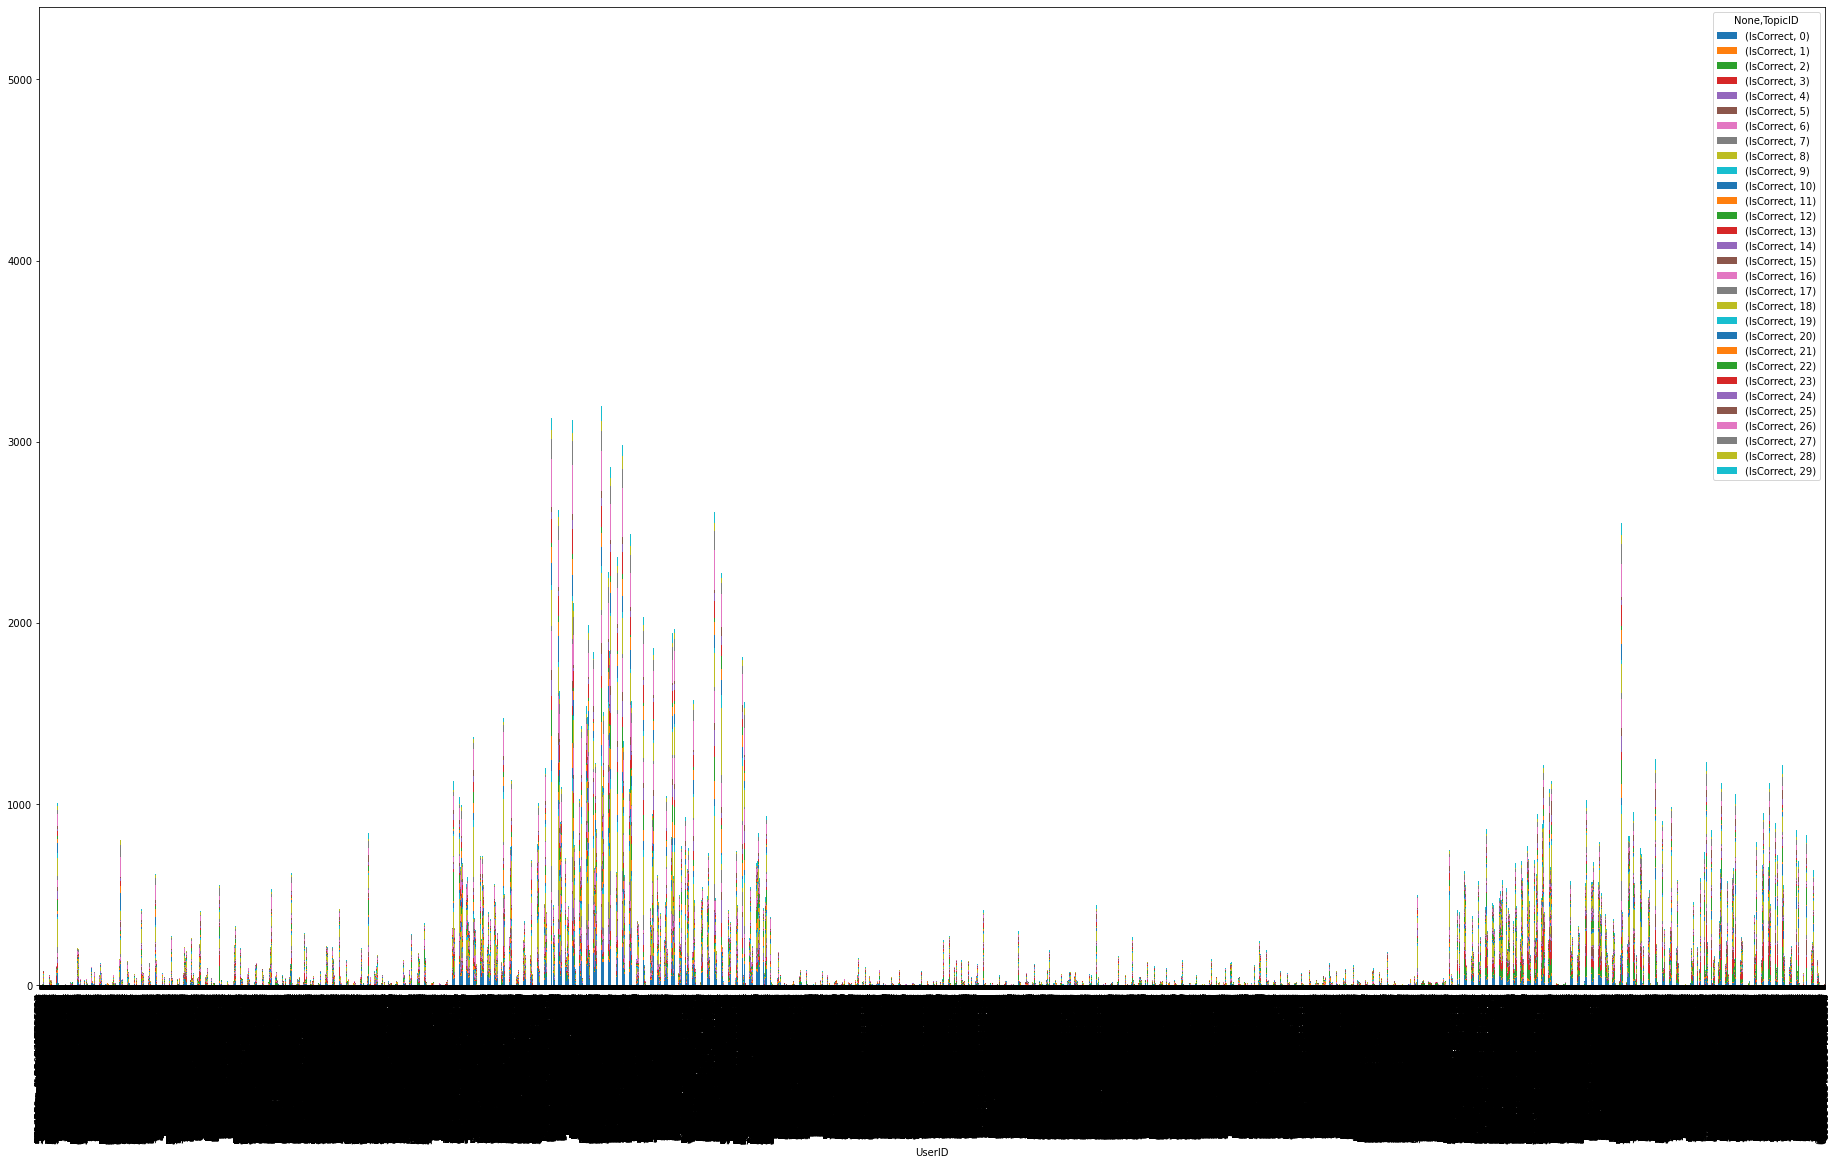

In [ ]:
# sns.scatterplot(data=falses_by_topic, y='IsCorrect', x='UserID', hue='TopicID')
falses_by_topic.plot(kind='bar', stacked=True, figsize=(32,18))

In [ ]:
falses_by_topic.describe()

IsCorrect                                                          \
TopicID            0             1             2             3             4    
count    19894.000000  19894.000000  19894.000000  19894.000000  19894.000000   
mean        18.287423      3.155725     11.814617     12.581934      7.449382   
std         33.346125      5.218753     23.010193     24.075803     17.408324   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          3.000000      1.000000      2.000000      2.000000      1.000000   
75%         22.000000      4.000000     13.000000     14.000000      7.000000   
max        397.000000     87.000000    241.000000    312.000000    180.000000   

                                                                               \
TopicID            5             6             7             8             9    
count    19894.000000  19894.000000  19894.000000  19894.000000  19894.000000   
mean         6.683774      5.701317      7.097165     25.119634      4.413542   
std         13.336934      9.406938     15.536093     57.335971      8.820646   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          1.000000      2.000000      1.000000      2.000000      1.000000   
75%          7.000000      7.000000      7.000000     19.000000      5.000000   
max        155.000000    111.000000    197.000000    704.000000    140.000000   

         ...                                                          \
TopicID  ...            20            21            22            23   
count    ...  19894.000000  19894.000000  19894.000000  19894.000000   
mean     ...      6.327486      5.502363      4.733638      6.164070   
std      ...     14.506846     11.696873      8.439635     14.849632   
min      ...      0.000000      0.000000      0.000000      0.000000   
25%      ...      0.000000      0.000000      0.000000      0.000000   
50%      ...      1.000000      1.000000      1.000000      1.000000   
75%      ...      5.000000      5.000000      6.000000      5.000000   
max      ...    233.000000    149.000000    134.000000    188.000000   

                                                                               \
TopicID            24            25            26            27            28   
count    19894.000000  19894.000000  19894.000000  19894.000000  19894.000000   
mean         5.046145      7.104856     16.140495      7.935961      3.751533   
std          8.574581     10.908155     34.487495     15.939255      7.189197   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          1.000000      3.000000      3.000000      1.000000      1.000000   
75%          6.000000     10.000000     15.000000      9.000000      4.000000   
max        120.000000    154.000000    452.000000    195.000000     84.000000   

                       
TopicID            29  
count    19894.000000  
mean         6.166332  
std         10.810256  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          7.000000  
max        129.000000  

[8 rows x 30 columns]

### Checking Assumptions

To put to test the assumption that a question reasoably takes 10-60s to solve, I set out to look at the data.

The goal was to make a sigmoid function which would operate on `TimeTaken` and return a normalised score depicting how the question affected the student's mastery level for the topics it was tagged with.

In [ ]:
sns.scatterplot(data=result.sample(10000), y='TimeTaken', x='QuestionID', hue='UserID', legend=False)

In [ ]:
result.describe()

TimeTaken         Marks
count  1.221347e+07  1.221347e+07
mean   5.098613e+04  1.318872e+00
std    4.973809e+05  1.803547e+00
min   -6.721000e+06 -1.400000e+01
25%    4.000000e+03  0.000000e+00
50%    1.500000e+04  1.000000e+00
75%    5.600000e+04  4.000000e+00
max    9.664220e+08  1.400000e+01

### Trying to NN?

The premise was to make an NN for each student that would have a vector representing the students' mastery of each subject as the output.

In [ ]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [ ]:
class MasteryPredictor(nn.Module):
  def __init__(self, D_in, D_out):
    super(MasteryPredictor, self).__init__()
    self.stack = nn.Sequential(
        nn.Linear(D_in, D_out),
        nn.ReLU(),
        nn.
    )

  def forward(self, x):
    return self.stack(x)